In [31]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
#reading dataset
ds=pd.read_csv("NIFTY.csv")
ds.head()
#droping date column
ds.drop('Date ',axis=1,inplace=True)
ds.head()



,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,19525.05,19545.15,19432.85,19528.80,396071122.0,24822.79
1,19564.65,19587.05,19525.75,19574.90,303958622.0,24029.89
2,19581.20,19636.45,19491.50,19611.05,512974083.0,32500.52
3,19598.65,19737.00,19550.05,19727.05,304929822.0,23591.00
4,19774.80,19867.15,19728.05,19819.95,288093693.0,23530.84


In [36]:
#chossing the dependent(Y) and independent(x) variables as x and y
x=ds.iloc[:, 0:3]
y=ds.iloc[:, 3]


y.fillna(y.mean(),inplace=True)
#spliting x and y for train and test
x_test, x_train, y_test, y_train=train_test_split(x,y,test_size=0.2,random_state=42)

#creating a linear regression model and predicting the target value
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)



#Giving the input values for prediction
#t=input("Enter the values: ")
#new_t=nm.array(list(map(float,t.split())))

#new_t = new_t.reshape(1, -1)
new_t=nm.array([['19524.05','18954.05','16051.75']],dtype=float)
new_y=reg.predict(new_t)

print(f"close Value:{new_y[0]:.2f}" )

#analysing error values
mse=mean_squared_error(y_test,y_pred)
print("MSE: ",mse)
r2 = r2_score(y_test, y_pred)
print("R-squared Error:", r2)

close Value:15973.71
MSE:  4468.425820470942
R-squared Error: 0.9983403486174918


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


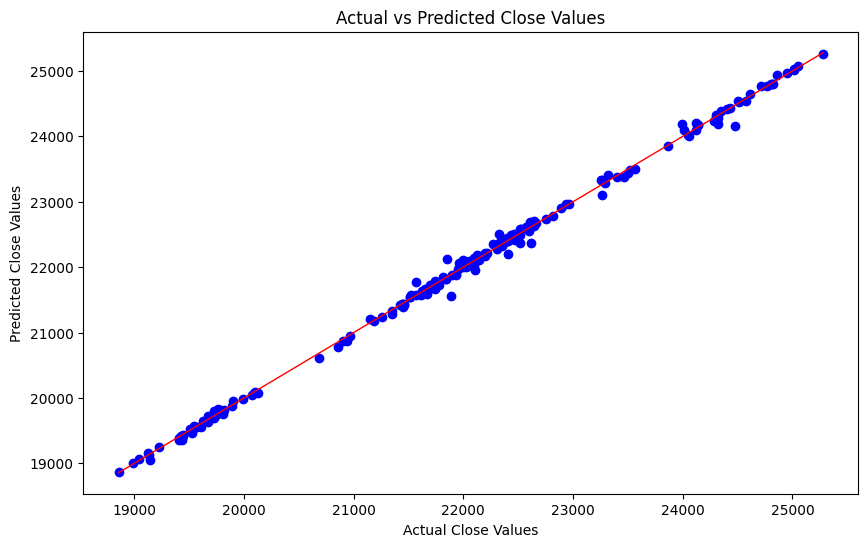

In [37]:
#scatter plot for the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Actual Close Values')
plt.ylabel('Predicted Close Values')
plt.title('Actual vs Predicted Close Values')
plt.show()